# Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support,matthews_corrcoef

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Load Data

In [39]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Explore Data

In [40]:
#Understand the data
print("------Training---------")
df_train.info()
df_train.head()
print("------Test---------")
df_test.info()
df_test.head()

------Training---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403279 entries, 0 to 2403278
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    object
 1   path       object
 2   timestamp  object
 3   gender     object
dtypes: object(4)
memory usage: 73.3+ MB
------Test---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275840 entries, 0 to 275839
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    275840 non-null  object
 1   path       275840 non-null  object
 2   timestamp  275840 non-null  object
dtypes: object(3)
memory usage: 6.3+ MB
Values:  [1 0]
Mean [Female(0)/Male(1)]:  0.30022190515541475


In [41]:
df_train['gender'] = df_train['gender'].replace('m', 1).replace('f',0)
print("Values: ", df_train.gender.unique())
print("Mean [Female(0)/Male(1)]: ", statistics.mean(df_train['gender']))

Values:  [1 0]
Mean [Female(0)/Male(1)]:  0.30022190515541475


# Preprocessing Data

In [42]:
#Delete row if it contains a null value -> here not relevant (no NaNs)
#df_train = df_train.dropna(how='any',axis=0) 

#Encode sting values to float values
#Sort first to check, that identical values are encoded identically
df_train.sort_values('user_id')
le = LabelEncoder()
df_train.user_id = le.fit_transform(df_train.user_id)
df_train.path = le.fit_transform(df_train.path)
df_train.timestamp = le.fit_transform(df_train.timestamp)
df_train.gender = le.fit_transform(df_train.gender)
df_train.head()

,user_id,path,timestamp,gender
0,10601,18408,0,1
1,2188,15339,1,0
2,2188,14179,2,0
3,2188,25460,3,0
4,2188,6697,4,0


# Training/ Test Data

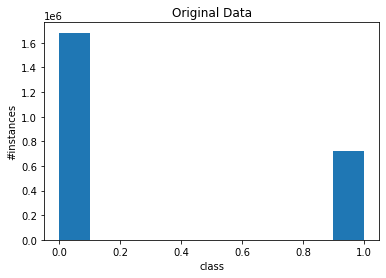

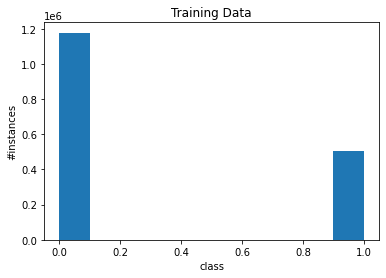

In [43]:
#Select User_id, Path and timestamp
X = df_train.iloc[:,0:3] #------------------------> Testing: Select only first 5000 rows
#Select gender
Y = df_train.iloc[:,3] #------------------------> Testing: Select only first 5000 rows
#Plot to check distribution
plt.figure()
plt.hist(Y)
plt.ylabel('#instances')
plt.xlabel('class')
plt.title('Original Data')
plt.show()
#Generate Test data and Training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
#Check if distribution of the training data is comparable to original data
plt.figure()
plt.hist(Y_train)
plt.ylabel('#instances')
plt.xlabel('class')
plt.title('Training Data')
plt.show()

# Binary Classifiaction

## 1st Round - General Trying

### Evaluation

In [ ]:
#precision: Percentage of positive predictions that are predicted correctly
#recall: Percentage of positive instances that are predicted correctly
#fscore: weighted average of the precision and recall
#MCC: Correlation between the prediction and the actual values

### K Nearest Neigbors

In [9]:
#best Nearest Neighbors (k=100)
classifiers = [KNeighborsClassifier(3),
               KNeighborsClassifier(5),
               KNeighborsClassifier(10),
               KNeighborsClassifier(20),
               KNeighborsClassifier(30),
               KNeighborsClassifier(50),
               KNeighborsClassifier(100),
               KNeighborsClassifier(300)]

clf_names = ["Nearest Neighbors (k=3)",
             "Nearest Neighbors (k=5)",
             "Nearest Neighbors (k=10)",
             "Nearest Neighbors (k=20)",
             "Nearest Neighbors (k=30)",
             "Nearest Neighbors (k=50)",
             "Nearest Neighbors (k=100)",
             "Nearest Neighbors (k=300)"]

scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Nearest Neighbors (k=3)
predicting labels for classifier Nearest Neighbors (k=3)
fitting classifier Nearest Neighbors (k=5)
predicting labels for classifier Nearest Neighbors (k=5)
fitting classifier Nearest Neighbors (k=10)
predicting labels for classifier Nearest Neighbors (k=10)
fitting classifier Nearest Neighbors (k=20)
predicting labels for classifier Nearest Neighbors (k=20)
fitting classifier Nearest Neighbors (k=30)
predicting labels for classifier Nearest Neighbors (k=30)
fitting classifier Nearest Neighbors (k=50)
predicting labels for classifier Nearest Neighbors (k=50)
fitting classifier Nearest Neighbors (k=100)
predicting labels for classifier Nearest Neighbors (k=100)


C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


fitting classifier Nearest Neighbors (k=300)
predicting labels for classifier Nearest Neighbors (k=300)


C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [10]:
scores_df

,Nearest Neighbors (k=3),Nearest Neighbors (k=5),Nearest Neighbors (k=10),Nearest Neighbors (k=20),Nearest Neighbors (k=30),Nearest Neighbors (k=50),Nearest Neighbors (k=100),Nearest Neighbors (k=300)
precision (macro),0.525719,0.527041,0.563270,0.561107,0.626007,0.725769,0.350167,0.350167
recall (macro),0.520660,0.517521,0.515848,0.505893,0.503976,0.502861,0.500000,0.500000
fscore (macro),0.517969,0.507428,0.471827,0.436859,0.423700,0.418750,0.411880,0.411880
precision (micro),0.631667,0.650000,0.691333,0.697000,0.701000,0.701667,0.700333,0.700333
recall (micro),0.631667,0.650000,0.691333,0.697000,0.701000,0.701667,0.700333,0.700333
fscore (micro),0.631667,0.650000,0.691333,0.697000,0.701000,0.701667,0.700333,0.700333
MCC,0.046102,0.043533,0.063331,0.037953,0.044767,0.050831,0.000000,0.000000


### Decsision Trees

In [11]:
classifiers = [DecisionTreeClassifier(max_depth=5),
               DecisionTreeClassifier(max_depth=10),
               DecisionTreeClassifier(max_depth=20),
               DecisionTreeClassifier(max_depth=30),
               DecisionTreeClassifier(max_depth=50),
               DecisionTreeClassifier(max_depth=100),
               DecisionTreeClassifier(max_depth=200),
               DecisionTreeClassifier(max_depth=300),
               DecisionTreeClassifier(max_depth=400),
               DecisionTreeClassifier(max_depth=500)]

clf_names = ["Decision Tree (Max Depth=5)",
             "Decision Tree (Max Depth=10)",
             "Decision Tree (Max Depth=20)",
             "Decision Tree (Max Depth=30)",
             "Decision Tree (Max Depth=50)",
             "Decision Tree (Max Depth=100)",
             "Decision Tree (Max Depth=200)",
             "Decision Tree (Max Depth=300)",
             "Decision Tree (Max Depth=400)",
             "Decision Tree (Max Depth=500)"]

In [12]:
scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Decision Tree (Max Depth=5)
predicting labels for classifier Decision Tree (Max Depth=5)
fitting classifier Decision Tree (Max Depth=10)
predicting labels for classifier Decision Tree (Max Depth=10)
fitting classifier Decision Tree (Max Depth=20)
predicting labels for classifier Decision Tree (Max Depth=20)
fitting classifier Decision Tree (Max Depth=30)
predicting labels for classifier Decision Tree (Max Depth=30)
fitting classifier Decision Tree (Max Depth=50)
predicting labels for classifier Decision Tree (Max Depth=50)
fitting classifier Decision Tree (Max Depth=100)
predicting labels for classifier Decision Tree (Max Depth=100)
fitting classifier Decision Tree (Max Depth=200)
predicting labels for classifier Decision Tree (Max Depth=200)
fitting classifier Decision Tree (Max Depth=300)
predicting labels for classifier Decision Tree (Max Depth=300)
fitting classifier Decision Tree (Max Depth=400)
predicting labels for classifier Decision Tree (Max Depth=400)
fitt

In [13]:
scores_df

,Decision Tree (Max Depth=5),Decision Tree (Max Depth=10),Decision Tree (Max Depth=20),Decision Tree (Max Depth=30),Decision Tree (Max Depth=50),Decision Tree (Max Depth=100),Decision Tree (Max Depth=200),Decision Tree (Max Depth=300),Decision Tree (Max Depth=400),Decision Tree (Max Depth=500)
precision (macro),0.647631,0.630022,0.649538,0.681769,0.722814,0.726405,0.722074,0.718204,0.722315,0.717421
recall (macro),0.515583,0.538729,0.587153,0.664115,0.725465,0.729516,0.724990,0.721337,0.724273,0.720543
fscore (macro),0.453247,0.509091,0.588297,0.670740,0.724097,0.727904,0.723480,0.719709,0.723271,0.718921
precision (micro),0.704333,0.706000,0.716333,0.736333,0.767000,0.770000,0.766333,0.763000,0.766667,0.762333
recall (micro),0.704333,0.706000,0.716333,0.736333,0.767000,0.770000,0.766333,0.763000,0.766667,0.762333
fscore (micro),0.704333,0.706000,0.716333,0.736333,0.767000,0.770000,0.766333,0.763000,0.766667,0.762333
MCC,0.095929,0.141924,0.228321,0.345434,0.448272,0.455911,0.447054,0.439530,0.446584,0.437953


### Random Forest

In [14]:
classifiers = [RandomForestClassifier(n_estimators=10, max_depth=3),
              RandomForestClassifier(n_estimators=10, max_depth=5),
              RandomForestClassifier(n_estimators=10, max_depth=10),
              RandomForestClassifier(n_estimators=100, max_depth=3),
              RandomForestClassifier(n_estimators=100, max_depth=5),
              RandomForestClassifier(n_estimators=100, max_depth=10),
              RandomForestClassifier(n_estimators=300, max_depth=30)]

clf_names = ["Random Forest (10Est, Max Depth=3)",
             "Random Forest (10Est, Max Depth=5)",
             "Random Forest (10Est, Max Depth=10)",
             "Random Forest (100Est, Max Depth=3)",
             "Random Forest (100Est, Max Depth=5)",
             "Random Forest (100Est, Max Depth=10)",
             "Random Forest (300Est, Max Depth=30)"]

In [15]:
scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Random Forest (10Est, Max Depth=3)
predicting labels for classifier Random Forest (10Est, Max Depth=3)
fitting classifier Random Forest (10Est, Max Depth=5)
predicting labels for classifier Random Forest (10Est, Max Depth=5)


C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt 

fitting classifier Random Forest (10Est, Max Depth=10)
predicting labels for classifier Random Forest (10Est, Max Depth=10)
fitting classifier Random Forest (100Est, Max Depth=3)
predicting labels for classifier Random Forest (100Est, Max Depth=3)
fitting classifier Random Forest (100Est, Max Depth=5)


C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


predicting labels for classifier Random Forest (100Est, Max Depth=5)
fitting classifier Random Forest (100Est, Max Depth=10)


C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


predicting labels for classifier Random Forest (100Est, Max Depth=10)
fitting classifier Random Forest (300Est, Max Depth=30)
predicting labels for classifier Random Forest (300Est, Max Depth=30)


In [16]:
scores_df

,"Random Forest (10Est, Max Depth=3)","Random Forest (10Est, Max Depth=5)","Random Forest (10Est, Max Depth=10)","Random Forest (100Est, Max Depth=3)","Random Forest (100Est, Max Depth=5)","Random Forest (100Est, Max Depth=10)","Random Forest (300Est, Max Depth=30)"
precision (macro),0.350167,0.350167,0.703630,0.350167,0.350167,0.684422,0.723677
recall (macro),0.500000,0.500000,0.524878,0.500000,0.500000,0.504372,0.596490
fscore (macro),0.411880,0.411880,0.469817,0.411880,0.411880,0.423053,0.595565
precision (micro),0.700333,0.700333,0.710667,0.700333,0.700333,0.702000,0.741000
recall (micro),0.700333,0.700333,0.710667,0.700333,0.700333,0.702000,0.741000
fscore (micro),0.700333,0.700333,0.710667,0.700333,0.700333,0.702000,0.741000
MCC,0.000000,0.000000,0.142350,0.000000,0.000000,0.056789,0.293821


### Logistic Regression & Gaussian NB

In [17]:
classifiers = [LogisticRegression(max_iter=10000),
               GaussianNB()]

clf_names = ["Logistic Regression(Iter. 1000)",
             "Gaussian Naive Bayes"]

In [18]:
scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Logistic Regression(Iter. 1000)
predicting labels for classifier Logistic Regression(Iter. 1000)
fitting classifier Gaussian Naive Bayes
predicting labels for classifier Gaussian Naive Bayes


C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt 

In [19]:
scores_df

,Logistic Regression(Iter. 1000),Gaussian Naive Bayes
precision (macro),0.350167,0.350167
recall (macro),0.500000,0.500000
fscore (macro),0.411880,0.411880
precision (micro),0.700333,0.700333
recall (micro),0.700333,0.700333
fscore (micro),0.700333,0.700333
MCC,0.000000,0.000000


### Machine Learning

In [20]:
classifiers = [MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=100, activation='relu')]

clf_names = ["MLP (RelU: 100,100, 100)"]

In [21]:
scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier MLP (RelU: 100,100, 100)
predicting labels for classifier MLP (RelU: 100,100, 100)


In [22]:
scores_df

,"MLP (RelU: 100,100, 100)"
precision (macro),0.518381
recall (macro),0.520797
fscore (macro),0.515023
precision (micro),0.562333
recall (micro),0.562333
fscore (micro),0.562333
MCC,0.039104


## 2nd Round - Improvement

In [29]:
classifiers = [DecisionTreeClassifier(max_depth=500),
               DecisionTreeClassifier(max_depth=600),
               DecisionTreeClassifier(max_depth=700),
               DecisionTreeClassifier(max_depth=800),
               RandomForestClassifier(n_estimators=100, max_depth=10),
               RandomForestClassifier(n_estimators=150, max_depth=20),
               RandomForestClassifier(n_estimators=200, max_depth=30),
               RandomForestClassifier(n_estimators=500, max_depth=50),]

clf_names = ["Decision Tree (Max Depth=500)",
             "Decision Tree (Max Depth=600)",
             "Decision Tree (Max Depth=700)",
             "Decision Tree (Max Depth=800)",
             "Random Forest (100Est, Max Depth=10)",
             "Random Forest (150Est, Max Depth=20)",
             "Random Forest (200Est, Max Depth=30)",
             "Random Forest (500Est, Max Depth=50)"]

In [30]:
scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf.fit(X_train, Y_train)
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test)
    scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
    scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))

fitting classifier Decision Tree (Max Depth=500)
predicting labels for classifier Decision Tree (Max Depth=500)
fitting classifier Decision Tree (Max Depth=600)
predicting labels for classifier Decision Tree (Max Depth=600)
fitting classifier Decision Tree (Max Depth=700)
predicting labels for classifier Decision Tree (Max Depth=700)
fitting classifier Decision Tree (Max Depth=800)
predicting labels for classifier Decision Tree (Max Depth=800)
fitting classifier Random Forest (100Est, Max Depth=10)
predicting labels for classifier Random Forest (100Est, Max Depth=10)
fitting classifier Random Forest (150Est, Max Depth=20)
predicting labels for classifier Random Forest (150Est, Max Depth=20)
fitting classifier Random Forest (200Est, Max Depth=30)
predicting labels for classifier Random Forest (200Est, Max Depth=30)
fitting classifier Random Forest (500Est, Max Depth=50)
predicting labels for classifier Random Forest (500Est, Max Depth=50)


In [31]:
scores_df

,Decision Tree (Max Depth=500),Decision Tree (Max Depth=600),Decision Tree (Max Depth=700),Decision Tree (Max Depth=800),"Random Forest (100Est, Max Depth=10)","Random Forest (150Est, Max Depth=20)","Random Forest (200Est, Max Depth=30)","Random Forest (500Est, Max Depth=50)"
precision (macro),0.723185,0.720741,0.721901,0.721071,0.744163,0.731404,0.731649,0.726420
recall (macro),0.725703,0.722685,0.723717,0.722604,0.505404,0.560243,0.600223,0.609526
fscore (macro),0.724406,0.721690,0.722789,0.721824,0.424472,0.536381,0.600499,0.613898
precision (micro),0.767333,0.765333,0.766333,0.765667,0.703000,0.727667,0.744000,0.746333
recall (micro),0.767333,0.765333,0.766333,0.765667,0.703000,0.727667,0.744000,0.746333
fscore (micro),0.767333,0.765333,0.766333,0.765667,0.703000,0.727667,0.744000,0.746333
MCC,0.448882,0.443421,0.445614,0.443673,0.072648,0.236140,0.304740,0.314953


# Decsion

In [29]:
#Use DecisionTreeClassifier(max_depth=500)

In [44]:
model_RF = DecisionTreeClassifier(max_depth=500)
model_name = 'DecisionTreeClassifier(max_depth=500)'
model_RF.fit(X_train, Y_train)
print('Model trained')

scores_micro = dict()
scores_macro = dict()
scores_mcc = dict()
Y_pred = model_RF.predict(X_test)

scores_micro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="micro")
scores_macro[name] = precision_recall_fscore_support(
        Y_test, Y_pred, average="macro")
scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)

scores_micro_df = pd.DataFrame(scores_micro, index=[
                               'precision (micro)', 'recall (micro)', 'fscore (micro)', 'support'])
scores_micro_df = scores_micro_df[0:3]  # drop support
scores_macro_df = pd.DataFrame(scores_macro, index=[
                               'precision (macro)', 'recall (macro)', 'fscore (macro)', 'support'])
scores_macro_df = scores_macro_df[0:3]
scores_df = scores_macro_df.append(scores_micro_df).append(
    pd.Series(scores_mcc, name='MCC'))
scores_df

Model trained


,"Random Forest (500Est, Max Depth=50)"
precision (macro),0.999086
recall (macro),0.999039
fscore (macro),0.999062
precision (micro),0.999212
recall (micro),0.999212
fscore (micro),0.999212
MCC,0.998125


In [45]:
confusion_matrix(Y_test, Y_pred)

array([[504263,    266],
       [   302, 216153]], dtype=int64)

# Application

In [46]:
le = LabelEncoder()
df_test.user_id = le.fit_transform(df_test.user_id)
df_test.path = le.fit_transform(df_test.path)
df_test.timestamp = le.fit_transform(df_test.timestamp)
df_test.head()

Xnew = df_test.iloc[:,0:3]
df_test['gender'] = model_RF.predict(Xnew)

df_test.head()
#df_test.to_excel("Labeled_Data.xlsx")

,user_id,path,timestamp,gender
0,1286,23181,0,1
1,1082,1404,1,0
2,654,3838,2,0
3,654,16888,3,0
4,86,26118,4,0


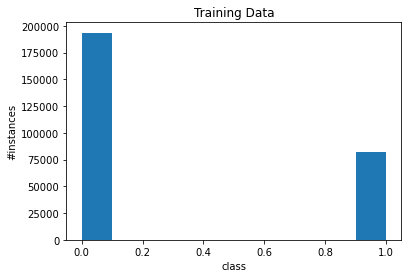

Values:  [1 0]
Mean [Female(0)/Male(1)]:  0.29834686774941993


In [47]:
#Check Results
plt.figure()
plt.hist(df_test.gender)
plt.ylabel('#instances')
plt.xlabel('class')
plt.title('Training Data')
plt.show()

print("Values: ", df_test.gender.unique())
print("Mean [Female(0)/Male(1)]: ", statistics.mean(df_test['gender']))